In [16]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from scipy.io import arff

#Importing Diabetic Retinopathy Dataset
dataset, meta = arff.loadarff('C:/Users/emnsrjm/Desktop/Courses/Machine Learning/Project/Project/Machine-Learning-Project/classification-models/Diabetic Retinopathy/data/messidor_features.arff')
data = pd.DataFrame(dataset)
X = data.iloc[:, :19].values
Y = data.iloc[:, 19].values

print(data)
print(X.shape)
print(Y.shape)

        0    1      2     3     4     5     6     7           8          9  \
0     1.0  1.0   22.0  22.0  22.0  19.0  18.0  14.0   49.895756  17.775994   
1     1.0  1.0   24.0  24.0  22.0  18.0  16.0  13.0   57.709936  23.799994   
2     1.0  1.0   62.0  60.0  59.0  54.0  47.0  33.0   55.831441  27.993933   
3     1.0  1.0   55.0  53.0  53.0  50.0  43.0  31.0   40.467228  18.445954   
4     1.0  1.0   44.0  44.0  44.0  41.0  39.0  27.0   18.026254   8.570709   
5     1.0  1.0   44.0  43.0  41.0  41.0  37.0  29.0   28.356400   6.935636   
6     1.0  0.0   29.0  29.0  29.0  27.0  25.0  16.0   15.448398   9.113819   
7     1.0  1.0    6.0   6.0   6.0   6.0   2.0   1.0   20.679649   9.497786   
8     1.0  1.0   22.0  21.0  18.0  15.0  13.0  10.0   66.691933  23.545543   
9     1.0  1.0   79.0  75.0  73.0  71.0  64.0  47.0   22.141784  10.054384   
10    1.0  1.0   45.0  45.0  45.0  43.0  40.0  32.0   84.358401  50.977459   
11    1.0  0.0   25.0  25.0  25.0  23.0  22.0  18.0   22.480047 

In [17]:
meta

Dataset: dr
	0's type is numeric
	1's type is numeric
	2's type is numeric
	3's type is numeric
	4's type is numeric
	5's type is numeric
	6's type is numeric
	7's type is numeric
	8's type is numeric
	9's type is numeric
	10's type is numeric
	11's type is numeric
	12's type is numeric
	13's type is numeric
	14's type is numeric
	15's type is numeric
	16's type is numeric
	17's type is numeric
	18's type is numeric
	Class's type is nominal, range is ('0', '1')

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)
print(Y)

[0 0 1 ... 0 1 0]


In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_encoded = sc.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size = 0.33, random_state = 0)

In [21]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

names = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB']
models = [KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear', random_state = 0),
          DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
          AdaBoostClassifier(n_estimators=10,learning_rate=1),
          LogisticRegression(random_state = 0,solver='lbfgs',multi_class='ovr'),
          GaussianNB()]

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = sklearn.metrics.accuracy_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for KNeighborsClassifier: 63.94736842105263
Accuracy for SVC: 72.10526315789474
Accuracy for DecisionTreeClassifier: 63.421052631578945
Accuracy for RandomForestClassifier: 67.89473684210526
Accuracy for AdaBoostClassifier: 64.73684210526316
Accuracy for LogisticRegression: 73.42105263157895
Accuracy for GaussianNB: 61.8421052631579


Text(0.5, 1.0, "Diabetic Retinopathy dataset model's accuracy")

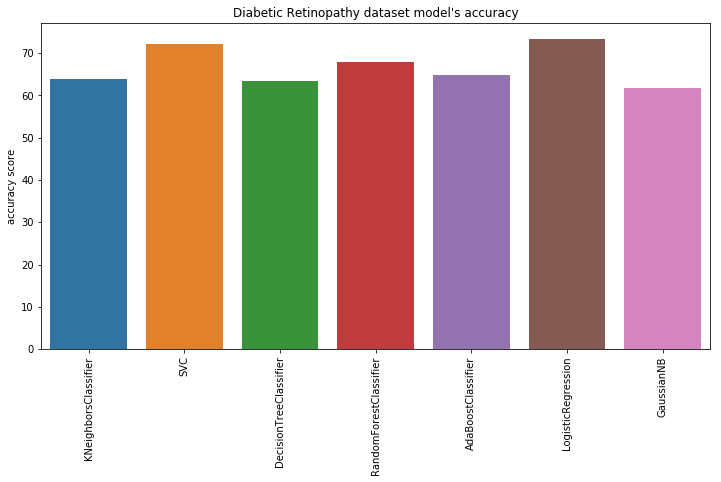

In [25]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Diabetic Retinopathy dataset model\'s accuracy')